<a href="https://colab.research.google.com/github/intimanjunath/Dimensionality_Reduction/blob/main/B_Dimensionality_Reduction_Workflow_Databricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install UMAP for Databricks environment
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.ml.feature import PCA as PCAml
from pyspark.ml.linalg import Vectors
from sklearn.decomposition import PCA, KernelPCA, IncrementalPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, MDS, LocallyLinearEmbedding
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Load a Dataset
from sklearn.datasets import load_breast_cancer

# Load Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Convert to Spark DataFrame
spark = SparkSession.builder.getOrCreate()
df = spark.createDataFrame(pd.concat([X, y], axis=1))
df.show(5)

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+------+
|mean radius|mean texture|mean perimeter|mean area|mean smoothness|mean compactness|mean concavity|mean concave points|mean symmetry|mean fractal dimension|radius error|texture error|perimeter error|area error|smoothness error|compactness error|concavity error|concave points error|symmetry error|fractal dimension error|worst radius|worst texture|worst perimeter|worst area|worst smoothness|worst compactness|worst concavity|worst concave points|worst symmetry|worst fractal dimension|target|
+-----------

In [10]:
#Pre processing i.e Standardize the dataset
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled data back to Pandas DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [5]:
#Randomized PCA with PySpark
# Prepare data for Spark ML PCA
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=X.columns.tolist(), outputCol="features")
df_transformed = assembler.transform(df)

# Apply PCA in PySpark
pca = PCAml(k=2, inputCol="features", outputCol="pca_features")
model = pca.fit(df_transformed)
df_pca = model.transform(df_transformed)

df_pca.show(5)

+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+------+--------------------+--------------------+
|mean radius|mean texture|mean perimeter|mean area|mean smoothness|mean compactness|mean concavity|mean concave points|mean symmetry|mean fractal dimension|radius error|texture error|perimeter error|area error|smoothness error|compactness error|concavity error|concave points error|symmetry error|fractal dimension error|worst radius|worst texture|worst perimeter|worst area|worst smoothness|worst compactness|worst concavity|worst concave points|worst symmetry|wo

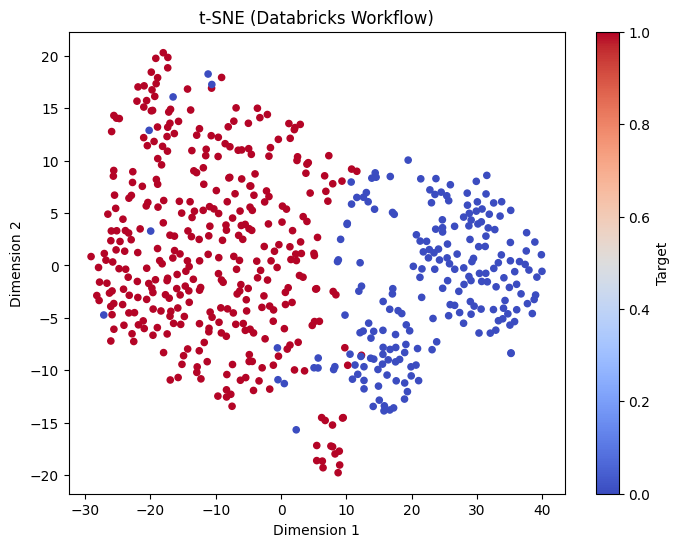

In [6]:
# Apply t-SNE in Sklearn
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("t-SNE (Databricks Workflow)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


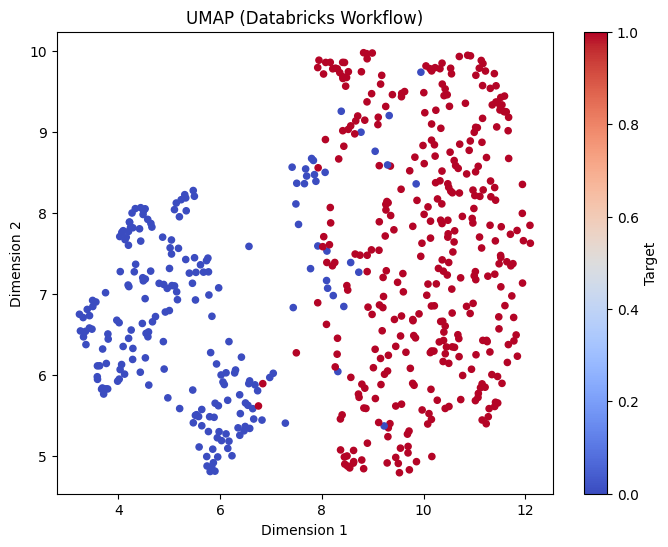

In [11]:
#UMAP
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("UMAP (Databricks Workflow)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [8]:
#LLE, Isomap, MDS, Autoencoders are performed below

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2672
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1729
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1698
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0738
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0627
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0257
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0202
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9225
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9126
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8959
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9129
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8464
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9021
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8687
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8455
Epoch 16/50
36/36 ━

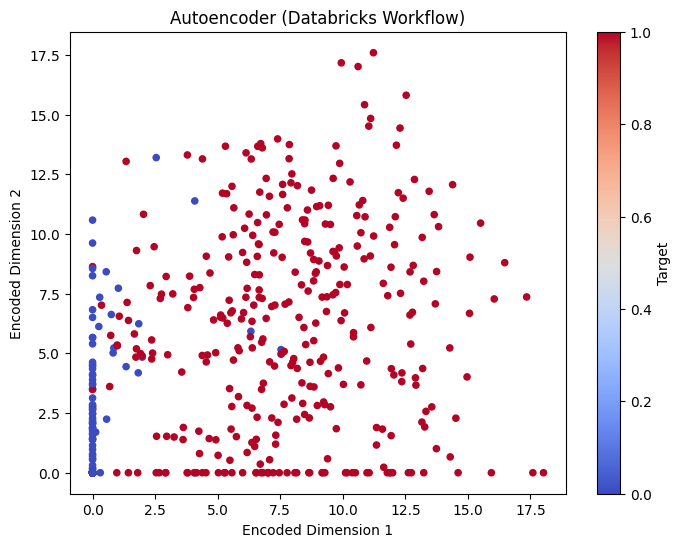

In [12]:
from keras.models import Model
from keras.layers import Input, Dense

# Define Autoencoder
input_dim = X_scaled.shape[1]
encoding_dim = 2  # Latent space dimension

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Compile Autoencoder
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train Autoencoder
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, verbose=1)

# Extract Encoded Data
encoder = Model(input_layer, encoded)
X_autoencoded = encoder.predict(X_scaled)

# Visualize Autoencoder results
plt.figure(figsize=(8, 6))
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y, cmap='coolwarm', s=20)
plt.colorbar(label='Target')
plt.title("Autoencoder (Databricks Workflow)")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()